# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
# 顯示 AMT_INCOME_TOTAL 欄位描述
income_describe = app_train['AMT_INCOME_TOTAL'].describe()
print('AMT_INCOME_TOTAL 欄位描述:\r\n{}\r\n'.format(income_describe))
print('平均值: {}'.format(income_describe.mean()))
print('標準差: {}'.format(income_describe.std()))


AMT_INCOME_TOTAL 欄位描述:
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

平均值: 14775154.00819698
標準差: 41305160.260392


          income
id              
100002  202500.0
100003  270000.0
100004   67500.0
100006  135000.0
100007  121500.0
...          ...
456251  157500.0
456252   72000.0
456253  153000.0
456254  171000.0
456255  157500.0

[307511 rows x 1 columns]


Text(0.5, 1.0, 'Income Histogram')

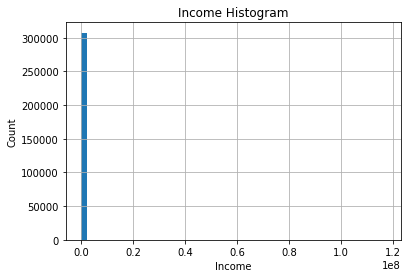

In [5]:
#擷取 AMT_INCOME_TOTAL 資料 做成 DataFrame
data = {'id': app_train['SK_ID_CURR'],
        'income': app_train['AMT_INCOME_TOTAL']}
dfIncome = pd.DataFrame(data, columns=['id', 'income'])
dfIncome.set_index('id', inplace=True)
print(dfIncome)

dfIncome.hist(bins = 50)
plt.ylabel('Count')
plt.xlabel('Income')
plt.title('Income Histogram')

Text(0.5, 1.0, 'Income Histogram (Clipped)')

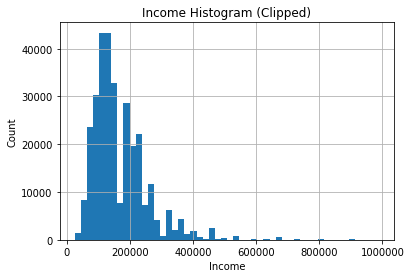

In [6]:
#前圖畫出來只有一根... 表示有太偏離的資料干擾 (統計到比爾蓋茲的收入?)
# 所以為了觀察細部分布, 得先拋棄一些偏離資料 (超過 1,000,000 的資料都丟掉)
indexIncomeTooHigh = dfIncome[ dfIncome['income'] >=  1.0e+06 ].index
dfIncome.drop(indexIncomeTooHigh , inplace=True)

dfIncome.hist(bins = 50)
plt.ylabel('Count')
plt.xlabel('Income')
plt.title('Income Histogram (Clipped)')